In [1]:
!pip install langdetect
!pip install emoji

In [1]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import emoji

# Load data 💽

In [2]:
df = pd.read_csv("Data/clean_by_date_comments.csv")

# Clean Data 🛀

Create new column to categorize the language used in each row. Drop undetectable comments.

In [3]:
df["language"] = None # create new column

undetectable = []
for idx, row in df.iterrows():
    try:
        language = detect(df['text'][idx])
        df.at[idx, 'language'] = language
    except:
        language = "error"
        undetectable.append(idx)
        df.at[idx, 'language'] = None

df = df.dropna() # drop undetectable columns

Exploration on language counts

In [4]:
print("count of language undetectable comments from dataset: ", len(undetectable))
print()

languages = df['language'].unique()
print("unique languages: ", languages)

count of language undetectable comments from dataset:  8590

unique languages:  ['en' 'af' 'sw' 'it' 'fi' 'pt' 'es' 'et' 'fa' 'id' 'sq' 'pl' 'fr' 'so'
 'ko' 'de' 'da' 'tl' 'no' 'he' 'lv' 'ca' 'cy' 'ur' 'sv' 'sk' 'hr' 'nl'
 'tr' 'ar' 'hu' 'sl' 'lt' 'vi' 'ro' 'cs' 'ru' 'ja' 'zh-cn' 'bn' 'el' 'bg'
 'mk' 'ml' 'th' 'mr' 'uk' 'gu' 'ne' 'hi' 'ta']


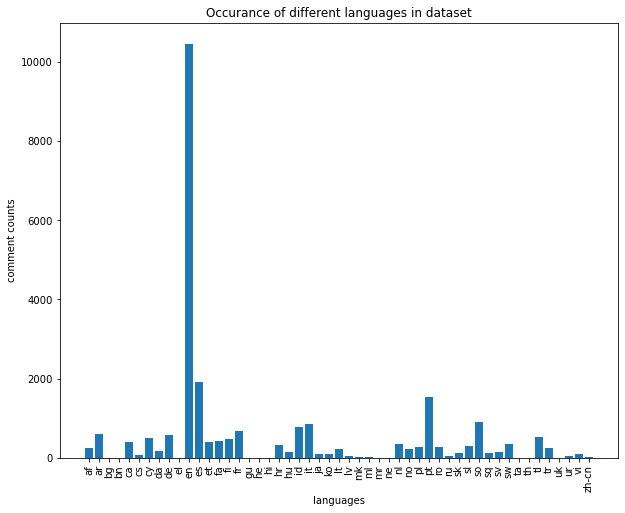

In [5]:
df2 = df.pivot_table(index='language', aggfunc='size')

plt.figure(figsize=(10, 8))
plt.bar(df2.index, df2.values)
plt.title("Occurance of different languages in dataset")
plt.xticks(rotation=90)
plt.xlabel("languages")
plt.ylabel("comment counts")
plt.show()


# Select English and Spanish with Emojis ✅

Create new dataframes for English and Spanish only.

In [14]:
def count_words(text):
    return len(text.split())

def emoji_list(text):
    emoji_list = []
    for char in text:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)
    return emoji_list

def text_only(text):
    result = ''
    for char in text:
        if char not in emoji.EMOJI_DATA:
            result = result + char
    return result

def emoji_pattern_list(text):
    emoji_pattern_list = []
    idx = 0
    while idx < len(text):
        if text[idx] in emoji.EMOJI_DATA:
            emoji_pattern_list.append(text[idx])
            while idx+1 < len(text) and text[idx+1] in emoji.EMOJI_DATA:
                emoji_pattern_list[-1] += text[idx+1]
                idx+=1
        idx+=1
    
    new_list = emoji_pattern_list.copy()
        
    for pattern in emoji_pattern_list:
        if len(pattern) <= 1:
            new_list.remove(pattern)
         
    return new_list

def emoji_repetition_list(text):
    emoji_repetition_list = []
    idx = 0
    while idx < len(text):
        if text[idx] in emoji.EMOJI_DATA:
            emoji_repetition_list.append(text[idx])
            while idx+1 < len(text) and text[idx+1] == text[idx]:
                emoji_repetition_list[-1] += text[idx+1]
                idx+=1
        idx+=1
    
    new_list = emoji_repetition_list.copy()
        
    for pattern in emoji_repetition_list:
        if len(pattern) <= 1:
            new_list.remove(pattern)
         
    return new_list

In [15]:
new_df = df[(df['language']=='es') | (df['language']=='en')]
new_df['word count'], new_df['emoji count'], new_df['emoji list'] = None, None, None

new_df['text only'] = new_df['text'].apply(text_only)
new_df['word count'] = new_df['text'].apply(count_words)
new_df['emoji list'] = new_df['text'].apply(emoji_list)
new_df['emoji count'] = new_df['emoji list'].apply(len)
new_df['emoji pattern list'] = new_df['text'].apply(emoji_pattern_list)
new_df['emoji repetition list'] = new_df['text'].apply(emoji_repetition_list)
new_df['timestamp'] = new_df['timestamp'].str[:10]

cleaned_df = new_df[(new_df['word count'] > 0) & (new_df['emoji count'] > 0)]
cleaned_df = cleaned_df.drop(cleaned_df[cleaned_df['timestamp'] == '2022-11-20'].index)

/var/folders/l8/77snn1n90h3d717n2q070pzw0000gn/T/ipykernel_64935/2004056874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['word count'], new_df['emoji count'], new_df['emoji list'] = None, None, None
/var/folders/l8/77snn1n90h3d717n2q070pzw0000gn/T/ipykernel_64935/2004056874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['word count'], new_df['emoji count'], new_df['emoji list'] = None, None, None
/var/folders/l8/77snn1n90h3d717n2q070pzw0000gn/T/ipykernel_64935/2004056874.py:2: Sett

In [20]:
# Sampling: take max(20, len(n)) comments of each language every day
import numpy as np
np.random.seed(0)
cleaned_df2 = cleaned_df.groupby([cleaned_df['timestamp'], 'language'], as_index=False).apply(lambda df: df.sample((min(10, len(df)))))

Graphing cleaned data.

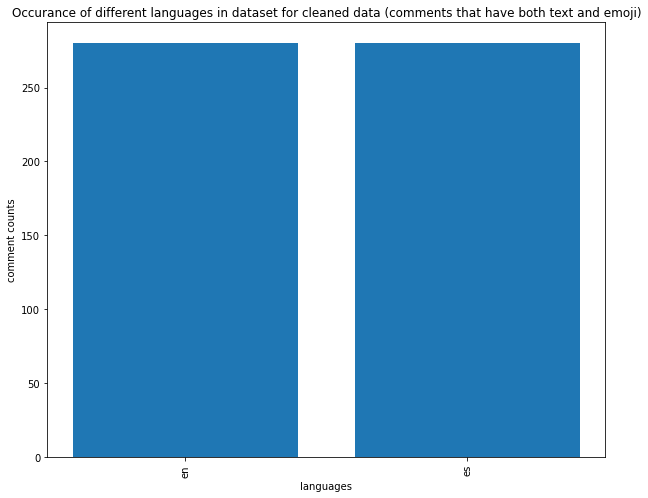

In [21]:
df3 = cleaned_df2.pivot_table(index='language', aggfunc='size')

plt.figure(figsize=(10, 8))
plt.bar(df3.index, df3.values)
plt.title("Occurance of different languages in dataset for cleaned data (comments that have both text and emoji)")
plt.xticks(rotation=90)
plt.xlabel("languages")
plt.ylabel("comment counts")
plt.show()

In [22]:
df3

language
en    280
es    280
dtype: int64

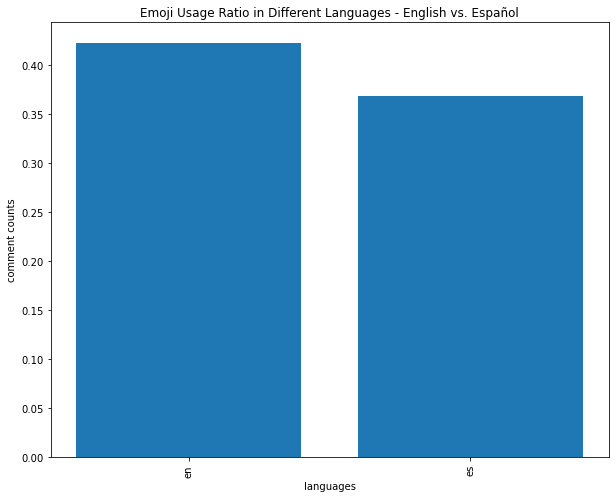

In [23]:
# ratio
df_with_emoji_and_text = new_df[new_df['word count'] > 0]
df4 = df_with_emoji_and_text.pivot_table(index='language', aggfunc='size')
df5 = cleaned_df.pivot_table(index='language', aggfunc='size')
plt.figure(figsize=(10, 8))
plt.bar(df5.index, df5.values/df4.values)
plt.title("Emoji Usage Ratio in Different Languages - English vs. Español")
plt.xticks(rotation=90)
plt.xlabel("languages")
plt.ylabel("comment counts")
plt.show()

Download to csv.

In [18]:
cleaned_df2.to_csv("Data/cleaned_by_language.csv")

NameError: name 'cleaned_df2' is not defined

In [25]:
# total number of rows after sampling
cleaned_df2.count()[0]

560